## Dataset

In [12]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataframe
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


## Preparing the dataset

In [3]:
# Convert the column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
# Select only the columns that we need
df = df[['ram','storage','screen','final_price']]
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


## EDA

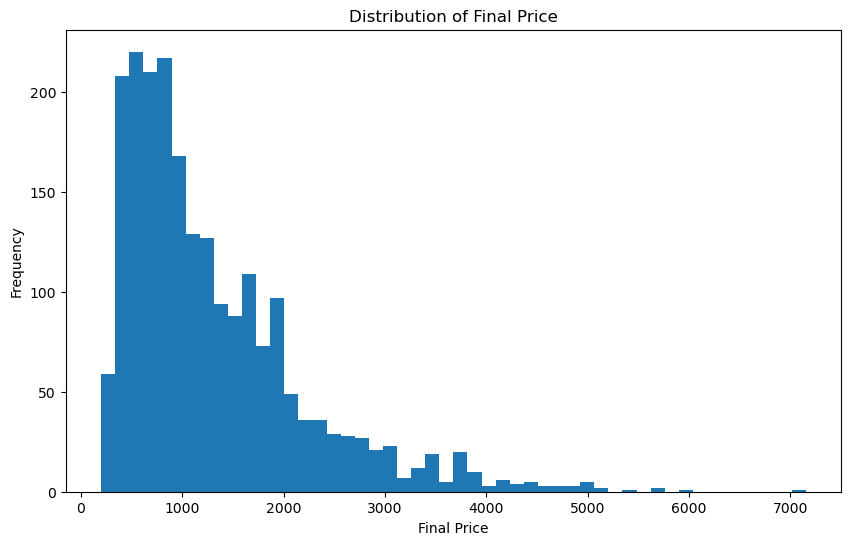

In [5]:
# Check the distribution of the target variable
plt.figure(figsize=(10, 6))
plt.hist(df['final_price'], bins=50)
plt.title('Distribution of Final Price')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.show()

Column 'final_price', the target variable has a long tail.

### Question 1

In [6]:
# Check for missing values
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

Column 'screen' has missing values.

### Question 2

In [7]:
# Find the median for 'ram' column
df['ram'].median()

16.0

In [ ]:
# Split the data into train, validation, and test sets with 60%/20%/20% distribution.
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [14]:
# Shuffle the dataset use seed 42   
idx = np.arange(n)

np.random.seed(42)

np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]

df_val = df.iloc[idx[n_train:n_train+n_val]]

df_test = df.iloc[idx[n_train+n_val:]]

df_train.shape, df_val.shape, df_test.shape

((1296, 4), (432, 4), (432, 4))

### Question 3

#### Option 1 - Fill missing values with 0.

In [16]:
# Option 1: Fill missing 'screen' values with 0
df_train_zero = df_train.fillna(0)
df_val_zero = df_val.fillna(0)

X_train_zero = df_train_zero[['ram', 'storage', 'screen']].values
y_train_zero = df_train_zero['final_price'].values

X_val_zero = df_val_zero[['ram', 'storage', 'screen']].values
y_val_zero = df_val_zero['final_price'].values

In [17]:
# Function to train linear regression model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [18]:
# Function to calculate RMSE
def rmse(y, y_pred):
    se = (y - y_pred)**2
    mse = np.mean(se)
    return np.sqrt(mse)

In [19]:
# Train the linear regression model using the function
w_0_zero, w_zero = train_linear_regression(X_train_zero, y_train_zero)

In [21]:
# Predictions and RMSE for option 1
y_pred_zero = w_0_zero + X_val_zero.dot(w_zero)
rmse_zero = rmse(y_val_zero, y_pred_zero)
rmse_zero = round(rmse_zero, 2)
rmse_zero

597.36

#### Option 2 - Fill missing values with mean of 'screen'.

In [23]:
# Fill missing 'screen' values with the mean
train_mean = df_train['screen'].mean()
df_train_mean = df_train.fillna(train_mean)
df_val_mean = df_val.fillna(train_mean)

In [24]:
X_train_mean = df_train_mean[['ram', 'storage', 'screen']].values
y_train_mean = df_train_mean['final_price'].values

X_val_mean = df_val_mean[['ram', 'storage', 'screen']].values
y_val_mean = df_val_mean['final_price'].values

In [25]:
# Train the linear regression model using the function
w_0_mean, w_mean = train_linear_regression(X_train_mean, y_train_mean)

In [27]:
# Predictions and RMSE for option 2
y_pred_mean = w_0_mean + X_val_mean.dot(w_mean)
rmse_mean = rmse(y_val_mean, y_pred_mean)
rmse_mean = round(rmse_mean, 2)
rmse_mean

600.27

In [28]:
# Output the RMSE for both options
print(f"RMSE with zero fill", rmse_zero)
print(f"RMSE with mean fill", rmse_mean)

RMSE with zero fill 597.36
RMSE with mean fill 600.27


So better RMSE (smaller value) we achieve with the option 1, filling the missing values with 0.

### Question 4

In [29]:
# Function to train regularized linear regression (Ridge regression)
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])  
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])  # Regularization term
    XTX = XTX + reg  
    XTX_inv = np.linalg.inv(XTX)  
    w_full = XTX_inv.dot(X.T).dot(y)  
    
    return w_full[0], w_full[1:]

In [30]:
# List of regularization parameters to try
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

# Store the RMSE results for each r
rmse_scores = []

In [31]:
# Train and evaluate the model for each r
for r in r_values:
    w_0, w = train_linear_regression_reg(X_train_zero, y_train_zero, r)
    y_pred = w_0 + X_val_zero.dot(w)
    rmse_score = rmse(y_val_zero, y_pred)
    rmse_score = round(rmse_score, 2)
    rmse_scores.append((r, rmse_score))

In [32]:
# Find the r with the best RMSE (smallest value)
best_r, best_rmse = min(rmse_scores, key=lambda x: x[1])

# Output the RMSE for each r and the best r
for r, score in rmse_scores:
    print(f"r = {r}: RMSE = {score}")

print(f"\nBest r: {best_r} with RMSE = {best_rmse}")

r = 0: RMSE = 597.36
r = 0.01: RMSE = 597.36
r = 0.1: RMSE = 597.35
r = 1: RMSE = 597.21
r = 5: RMSE = 597.01
r = 10: RMSE = 597.06
r = 100: RMSE = 597.9

Best r: 5 with RMSE = 597.01


### Question 5

In [33]:
# Prepare features and target
df_filled = df.fillna(0)  

X = df_filled[['ram', 'storage', 'screen']].values
y = df_filled['final_price'].values

# List of seeds to try
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Store the RMSE results for each seed
rmse_scores = []

In [34]:
# Loop through the seeds
for seed in seeds:
    # Shuffle the data and split into train/validation/test sets
    np.random.seed(seed)
    idx = np.arange(len(df))
    np.random.shuffle(idx)

    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    # Train/Validation/Test split
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    # Prepare the train and validation sets (fill NAs with 0)
    X_train = df_train[['ram', 'storage', 'screen']].fillna(0).values
    y_train = df_train['final_price'].values

    X_val = df_val[['ram', 'storage', 'screen']].fillna(0).values
    y_val = df_val['final_price'].values

    # Train the linear regression model
    w_0, w = train_linear_regression(X_train, y_train)

    # Predict on the validation set and calculate RMSE
    y_pred = w_0 + X_val.dot(w)
    rmse_score = rmse(y_val, y_pred)
    rmse_scores.append(rmse_score)

In [35]:
# Calculate the standard deviation of the RMSE scores
rmse_std = np.std(rmse_scores)
rmse_std = round(rmse_std, 3)

# Output the RMSE scores and the standard deviation
rmse_scores_rounded = [round(score, 2) for score in rmse_scores]
print(f"RMSE scores for each seed: {rmse_scores_rounded}")
print(f"Standard deviation of RMSE scores: {rmse_std}")

RMSE scores for each seed: [565.45, 636.8, 588.96, 597.81, 571.96, 573.24, 647.34, 550.44, 587.33, 576.1]
Standard deviation of RMSE scores: 29.176


### Question 6

In [38]:
# Split the data using seed 9
np.random.seed(9)
idx = np.arange(len(df))
np.random.shuffle(idx)

n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# Train/Validation/Test split
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

# Combine the train and validation sets
df_train_combined = pd.concat([df_train, df_val])
df_train_combined.shape

(1728, 4)

In [39]:
# Prepare the combined train set (fill NAs with 0)
X_train_combined = df_train_combined[['ram', 'storage', 'screen']].fillna(0).values
y_train_combined = df_train_combined['final_price'].values

# Prepare the test set (fill NAs with 0)
X_test = df_test[['ram', 'storage', 'screen']].fillna(0).values
y_test = df_test['final_price'].values

In [40]:
# Train the model with regularization (r=0.001)
w_0, w = train_linear_regression_reg(X_train_combined, y_train_combined, r=0.001)

# Make predictions on the test set
y_pred_test = w_0 + X_test.dot(w)

# Calculate the RMSE on the test set
rmse_test = rmse(y_test, y_pred_test)
rmse_test = round(rmse_test, 2)

# Output the RMSE on the test set
print(f"RMSE on the test dataset: {rmse_test}")

RMSE on the test dataset: 608.61
